In [2]:
# Scrape a Table with Splinter and Beautiful Soup
from splinter import Browser
from bs4 import BeautifulSoup as soup
from webdriver_manager.chrome import ChromeDriverManager
import requests
import pandas as pd


# Set up Splinter
executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, headless=False)

# Visit the Mars Facts site
url = 'https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html'
browser.visit(url)

html = browser.html
html_soup = soup(html, 'html.parser')

In [3]:
# fining a table 
table = html_soup.find('table', class_='table')

In [4]:
#  Finding the header and row data
headers = []

for i in table.find_all('th'):
    title = i.text.strip()
    headers.append(title)
    
mars_df = pd.DataFrame(columns = headers)

for row in table.find_all('tr')[1:]:
    data = row.find_all('td')
    row_data = [td.text.strip() for td in data]
    length = len(mars_df)
    mars_df.loc[length] = row_data


In [5]:
mars_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


In [6]:
mars_df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [7]:
# Convert the data type of the "id" column to a interger.
mars_df['id'] = mars_df['id'].astype(int)

# Convert the data type of the "terrestrial_date" column to a datetime.
mars_df['terrestrial_date'] = pd.to_datetime(mars_df['terrestrial_date'],infer_datetime_format =True)

# Convert the data type of the "sol" column to a int.
mars_df['sol'] = mars_df['sol'].astype(int)

# Convert the data type of the "ls" column to a interger.
mars_df['ls'] = mars_df['ls'].astype(int)

# Convert the data type of the "month" column to a interger.
mars_df['month'] = mars_df['month'].astype(int)

# Convert the data type of the "min_temp" column to a float.
mars_df['min_temp'] = mars_df['min_temp'].astype(float)

# Convert the data type of the "pressure" column to a float.
mars_df['pressure'] = mars_df['pressure'].astype(float)

mars_df.dtypes

id                           int32
terrestrial_date    datetime64[ns]
sol                          int32
ls                           int32
month                        int32
min_temp                   float64
pressure                   float64
dtype: object

In [11]:
# Answer the following question: How many months exist on Mars?
mars_df.describe().round(0)

,id,sol,ls,month,min_temp,pressure
count,1867.0,1867.0,1867.0,1867.0,1867.0,1867.0
mean,956.0,1016.0,169.0,6.0,-76.0,841.0
std,545.0,565.0,106.0,4.0,6.0,54.0
min,2.0,10.0,0.0,1.0,-90.0,727.0
25%,490.0,546.0,78.0,3.0,-80.0,800.0
50%,959.0,1028.0,160.0,6.0,-76.0,853.0
75%,1426.0,1506.0,258.0,9.0,-72.0,883.0
max,1895.0,1977.0,359.0,12.0,-62.0,925.0


In [22]:
# Numbers of Days in each month for Mars
num_months = mars_df.groupby(by="month").count()["terrestrial_date"]
num_months

month
1     174
2     178
3     192
4     194
5     149
6     147
7     142
8     141
9     134
10    112
11    138
12    166
Name: terrestrial_date, dtype: int64

In [23]:
# Answer the following question: How many Martian (and not Earth) days worth of data exist in the scraped dataset?
mars_df.shape

(1867, 7)

In [24]:
## Answers to the following question:
   ### What are the coldest and the warmest months on Mars (at the location of Curiosity)?

In [25]:
# Mars Warmest day in each months
max_dailyTemp_by_months = mars_df.groupby(by='month').max()
max_dailyTemp_by_months.loc[:, ["terrestrial_date","min_temp"]]

,terrestrial_date,min_temp
month,,
1,2017-07-07,-62.0
2,2017-09-12,-76.0
3,2017-11-19,-77.0
4,2018-01-25,-77.0
5,2018-02-27,-74.0
6,2016-07-02,-71.0
7,2016-08-24,-65.0
8,2016-10-11,-63.0
9,2016-11-28,-63.0


In [26]:
# Mars Coldest day in each month
min_dailyTemp_by_months = mars_df.groupby(by='month').min()
min_dailyTemp_by_months.loc[:, ["terrestrial_date","min_temp"]]

,terrestrial_date,min_temp
month,,
1,2013-08-01,-82.0
2,2013-10-03,-86.0
3,2013-12-09,-90.0
4,2014-02-16,-89.0
5,2014-04-23,-85.0
6,2012-08-16,-84.0
7,2012-09-30,-78.0
8,2012-11-20,-75.0
9,2013-01-08,-78.0


In [27]:

# Get the answer by averaging the minimum daily temperature of all the months. 
avg_min_daily_temp = mars_df['min_temp'].mean()
avg_min_daily_temp


-76.12104981253347

In [28]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt

In [29]:
# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

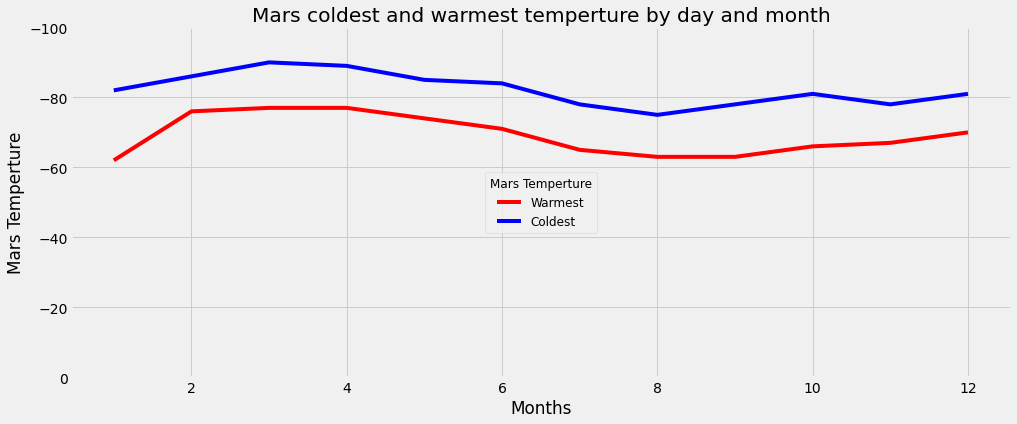

In [32]:
# Plot the results as a bar chart.

plt.figure(figsize=(15,6))
plt.plot(max_dailyTemp_by_months.min_temp, color="red" , label="Warmest")
plt.plot(min_dailyTemp_by_months.min_temp, color="blue", label="Coldest")
# Create labels for the y axes.
plt.ylabel("Mars Temperture")
# Set the y limit between 0 and -95.
plt.ylim(0, -100)
# Set the x axis
plt.xlabel("Months")
#plt.xlim ("Feb",,"Jun","Aug","Oct","Dec")
# Create a title.
plt.title("Mars coldest and warmest temperture by day and month")
plt.grid(True)
# Add the legend.
plt.legend(loc=10)

# Create a legend
lgnd = plt.legend(fontsize="12", mode="Expanded", loc="center", title="Mars Temperture")
lgnd.get_title().set_fontsize(12)

# Save the figure.
plt.savefig("analysis/mars_warmest_coldest_day.png")

# Show the plot
plt.show()

In [33]:
# Answer the following question: Which months have the lowest and the highest atmospheric pressure on Mars? 
# Mars highest atmospheric pressure in each month
max_dailypressure_by_months = mars_df.groupby(by='month').max()
max_dailypressure_by_months.loc[:, ["terrestrial_date","pressure"]]

,terrestrial_date,pressure
month,,
1,2017-07-07,888.0
2,2017-09-12,908.0
3,2017-11-19,907.0
4,2018-01-25,857.0
5,2018-02-27,777.0
6,2016-07-02,764.0
7,2016-08-24,836.0
8,2016-10-11,914.0
9,2016-11-28,925.0


In [34]:
# Mars lowest presure  in each month
min_dailypressure_by_months = mars_df.groupby(by='month').min()
min_dailypressure_by_months.loc[:, ["terrestrial_date","pressure"]]

,terrestrial_date,pressure
month,,
1,2013-08-01,820.0
2,2013-10-03,867.0
3,2013-12-09,833.0
4,2014-02-16,754.0
5,2014-04-23,727.0
6,2012-08-16,732.0
7,2012-09-30,751.0
8,2012-11-20,828.0
9,2013-01-08,896.0


In [39]:
#The average daily atmospheric pressure of all the months

avg_dailypressure = mars_df.groupby(by='month').mean()
avg_dailypressure.loc[:, ["pressure"]].round(0)

,pressure
month,
1,862.0
2,889.0
3,877.0
4,806.0
5,749.0
6,745.0
7,795.0
8,874.0
9,913.0


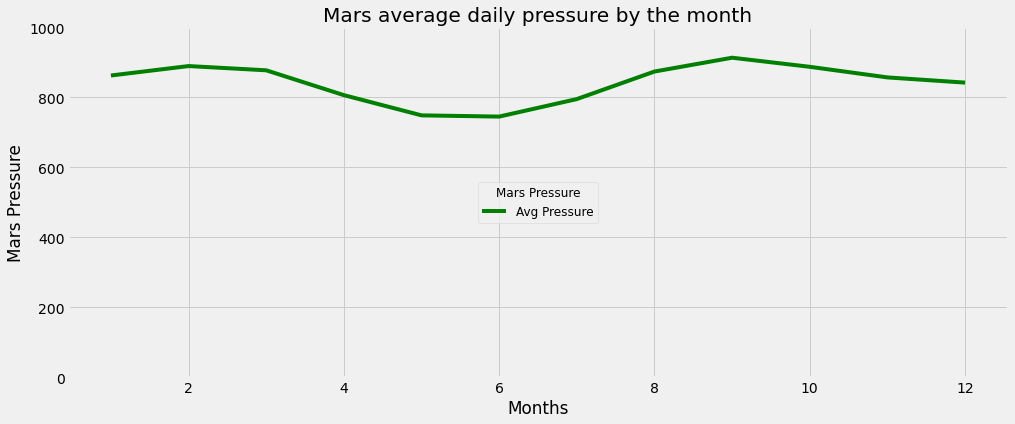

In [42]:
# Get the answer by averaging the daily atmospheric pressure of all the months. Plot the results as a bar chart.

plt.figure(figsize=(15,6))
plt.plot(avg_dailypressure.pressure, color="green" , label="Avg Pressure")

# Create labels for the y axes.
plt.ylabel("Mars Pressure")
# Set the y limit between 0 and -95.
plt.ylim(0, 1000)
# Set the x axis
plt.xlabel("Months")

# Create a title.
plt.title("Mars average daily pressure by the month")
plt.grid(True)
# Add the legend.
plt.legend(loc=10)

# Create a legend
lgnd = plt.legend(fontsize="12", mode="Expanded", loc="center", title="Mars Pressure")
lgnd.get_title().set_fontsize(12)

# Save the figure.
plt.savefig("analysis/mars_avg_pressure_month.png")

# Show the plot
plt.show()

In [44]:
# Answer the following question: About how many terrestrial (Earth) days exist in a Martian year? 
sum_mars_days = mars_df.count()["terrestrial_date"]
sum_mars_days
# That is, in the time that Mars circles the Sun once, how many days elapse on Earth? 
# Visually estimate the result by plotting the daily minimum temperature.

1867

In [45]:
#Export the DataFrame to a CSV file.
# Export the DataFrame as a CSV file using encoding='utf8'.
mars_df.to_csv(r'C:\Users\Jared\Module 11\Practice\analysis\\mars_temperature.csv', index=False, encoding='utf8')
